# Kaggle Contest ----> House Price Predictions 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description

We are given many features that a person wants to have in his house. On the basis of these feature, price of house is estimated.

So, here we are given a number of features(almost 80) and we need to predict the price of the house.

## 1) Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.functional as F

## 2) Checking for GPU

In [2]:
torch.cuda.is_available()

True

## 3) Data Preprocessing

For train file

In [3]:
df = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
len(df)

1460

For Test file

In [5]:
# For test file

df_test = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
len(df_test)

1459

### 3.1) Handling missing values

For train file

In [7]:
# Checking for null values

cols = np.array(df.columns)
for col in cols:
  print(col , df[col].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [8]:
# Removing the columns that contains entries above 500 as Nan.

cols_to_del = []
for col in cols:
  if df[col].isnull().sum() > 500:
    cols_to_del.append(col)

cols_to_del

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [0]:
for col in cols_to_del:
  df.drop(col, axis = 1, inplace = True)

In [0]:
cols = np.array(df.columns)
cols_to_fill_missing_values = []
for col in cols:
  #print(col,  df[col].isnull().sum())
  if df[col].isnull().sum() > 0:
    cols_to_fill_missing_values.append((col, df[col].dtype))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
cols_to_fill_missing_values

[('LotFrontage', dtype('float64')),
 ('MasVnrType', dtype('O')),
 ('MasVnrArea', dtype('float64')),
 ('BsmtQual', dtype('O')),
 ('BsmtCond', dtype('O')),
 ('BsmtExposure', dtype('O')),
 ('BsmtFinType1', dtype('O')),
 ('BsmtFinType2', dtype('O')),
 ('Electrical', dtype('O')),
 ('GarageType', dtype('O')),
 ('GarageYrBlt', dtype('float64')),
 ('GarageFinish', dtype('O')),
 ('GarageQual', dtype('O')),
 ('GarageCond', dtype('O'))]

- Now, fill all the columns other than Object Datatype by the mean of the remaining values.
- Deleting all the rows that have null values of object datatype.

In [13]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace = True)
#df.dropna(inplace=True)
df.fillna('missing',inplace=True)
len(df)

1460

For Test file

In [15]:
# Checking for null values

cols_test = np.array(df_test.columns)

# Removing the columns that contains entries above 500 as Nan.

cols_to_del_test = []
for col in cols_test:
  if df_test[col].isnull().sum() > 500:
    cols_to_del_test.append(col)

for col in cols_to_del_test:
  df_test.drop(col, axis = 1, inplace = True)

cols_test = np.array(df_test.columns)
cols_to_fill_missing_values_test = []
for col in cols_test:
  #print(col,  df[col].isnull().sum())
  if df_test[col].isnull().sum() > 0:
    cols_to_fill_missing_values_test.append((col, df_test[col].dtype))

df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(),inplace = True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean(),inplace = True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean(),inplace = True)
#df_test.dropna(inplace=True)
df_test.fillna('missing',inplace=True)
len(df_test)

1459

In [16]:
for col in cols_test:
  print(col,  df[col].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 0
LotArea 0
Street 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 0
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
GarageType 0
GarageYrBlt 0
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCondition 0


### 3.2) Handling of categorical, continuous and label values



In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [19]:
# For train file

cols = np.array(df.columns)
print(len(cols))
cols = np.delete(cols, [0,75])
print(cols)

# For test file

cols_test = np.array(df_test.columns)
cols_test = np.delete(cols_test, [0,75])

76
['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'RoofMatl'
 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea' 'ExterQual'
 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'GarageType' 'GarageYrBlt'
 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond'
 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold' 'SaleType'
 'SaleCondition']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  # Remove the CWD from sys.path while we load stuff.


In [20]:
# For train file

y_cols = ['SalePrice']
categorical_cols = []
continous_cols = []

for col in cols:
  if df[col].dtype == 'O':
    categorical_cols.append(col)
  else:
    continous_cols.append(col)

print(len(categorical_cols), categorical_cols)
print(len(continous_cols), continous_cols)
print(len(y_cols), y_cols) 

# For test file

y_cols_test = ['SalePrice']
categorical_cols_test = []
continous_cols_test = []

for col in cols_test:
  if df_test[col].dtype == 'O':
    categorical_cols_test.append(col)
  else:
    continous_cols_test.append(col)

print(len(categorical_cols_test), categorical_cols_test)
print(len(continous_cols_test), continous_cols_test)
print(len(y_cols_test), y_cols_test) 

38 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
36 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'M

In [0]:
# Changing the datatype of categorical data to `category`

# For train file

for col in categorical_cols:
  df[col] = df[col].astype('category')  

# For test file

for col in categorical_cols_test:
  df_test[col] = df_test[col].astype('category')  


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

For Categorical Data

In [23]:
# For train data

cats = []
for col in categorical_cols:
  cats.append(df[col].cat.codes.values)
cats = np.array(cats)  
cats = cats.transpose()
print(cats.shape, cats)

# For test data

cats_test = []
for col in categorical_cols_test:
  cats_test.append(df_test[col].cat.codes.values)
cats_test = np.array(cats_test)  
cats_test = cats_test.transpose()
print(cats_test.shape, cats_test)

(1460, 38) [[3 1 3 ... 2 8 4]
 [3 1 3 ... 2 8 4]
 [3 1 0 ... 2 8 4]
 ...
 [3 1 3 ... 2 8 4]
 [3 1 3 ... 2 8 4]
 [3 1 3 ... 2 8 4]]
(1459, 46) [[2 1 3 ... 2 8 4]
 [3 1 0 ... 2 8 4]
 [3 1 0 ... 2 8 4]
 ...
 [3 1 3 ... 2 8 0]
 [3 1 3 ... 2 8 4]
 [3 1 3 ... 2 8 4]]


For Continous Data

In [24]:
# For train data

conts = []
for col in continous_cols:
  conts.append(df[col].values)

conts = np.array(conts)
conts = conts.transpose()
print(conts.shape, conts)

# For test data

conts_test = []
for col in continous_cols_test:
  conts_test.append(df_test[col].values)

conts_test = np.array(conts_test)
conts_test = conts_test.transpose()
print(conts_test.shape, conts_test)

(1460, 36) [[6.000e+01 6.500e+01 8.450e+03 ... 0.000e+00 2.000e+00 2.008e+03]
 [2.000e+01 8.000e+01 9.600e+03 ... 0.000e+00 5.000e+00 2.007e+03]
 [6.000e+01 6.800e+01 1.125e+04 ... 0.000e+00 9.000e+00 2.008e+03]
 ...
 [7.000e+01 6.600e+01 9.042e+03 ... 2.500e+03 5.000e+00 2.010e+03]
 [2.000e+01 6.800e+01 9.717e+03 ... 0.000e+00 4.000e+00 2.010e+03]
 [2.000e+01 7.500e+01 9.937e+03 ... 0.000e+00 6.000e+00 2.008e+03]]
(1459, 28) [[2.0000e+01 8.0000e+01 1.1622e+04 ... 0.0000e+00 6.0000e+00 2.0100e+03]
 [2.0000e+01 8.1000e+01 1.4267e+04 ... 1.2500e+04 6.0000e+00 2.0100e+03]
 [6.0000e+01 7.4000e+01 1.3830e+04 ... 0.0000e+00 3.0000e+00 2.0100e+03]
 ...
 [2.0000e+01 1.6000e+02 2.0000e+04 ... 0.0000e+00 9.0000e+00 2.0060e+03]
 [8.5000e+01 6.2000e+01 1.0441e+04 ... 7.0000e+02 7.0000e+00 2.0060e+03]
 [6.0000e+01 7.4000e+01 9.6270e+03 ... 0.0000e+00 1.1000e+01 2.0060e+03]]


Converting the categorical and continous data to one-hot encoder

In [25]:
# For train data

categorical = np.stack(cats, axis=0)
print(categorical)

# For test data

categorical_test = np.stack(cats_test, axis=0)
print(categorical_test)


[[3 1 3 ... 2 8 4]
 [3 1 3 ... 2 8 4]
 [3 1 0 ... 2 8 4]
 ...
 [3 1 3 ... 2 8 4]
 [3 1 3 ... 2 8 4]
 [3 1 3 ... 2 8 4]]
[[2 1 3 ... 2 8 4]
 [3 1 0 ... 2 8 4]
 [3 1 0 ... 2 8 4]
 ...
 [3 1 3 ... 2 8 0]
 [3 1 3 ... 2 8 4]
 [3 1 3 ... 2 8 4]]


In [26]:
# For train data

continous = np.stack(conts, axis = 0)
print(continous)

# For test data

continous_test = np.stack(conts_test, axis = 0)
print(continous_test)

[[6.000e+01 6.500e+01 8.450e+03 ... 0.000e+00 2.000e+00 2.008e+03]
 [2.000e+01 8.000e+01 9.600e+03 ... 0.000e+00 5.000e+00 2.007e+03]
 [6.000e+01 6.800e+01 1.125e+04 ... 0.000e+00 9.000e+00 2.008e+03]
 ...
 [7.000e+01 6.600e+01 9.042e+03 ... 2.500e+03 5.000e+00 2.010e+03]
 [2.000e+01 6.800e+01 9.717e+03 ... 0.000e+00 4.000e+00 2.010e+03]
 [2.000e+01 7.500e+01 9.937e+03 ... 0.000e+00 6.000e+00 2.008e+03]]
[[2.0000e+01 8.0000e+01 1.1622e+04 ... 0.0000e+00 6.0000e+00 2.0100e+03]
 [2.0000e+01 8.1000e+01 1.4267e+04 ... 1.2500e+04 6.0000e+00 2.0100e+03]
 [6.0000e+01 7.4000e+01 1.3830e+04 ... 0.0000e+00 3.0000e+00 2.0100e+03]
 ...
 [2.0000e+01 1.6000e+02 2.0000e+04 ... 0.0000e+00 9.0000e+00 2.0060e+03]
 [8.5000e+01 6.2000e+01 1.0441e+04 ... 7.0000e+02 7.0000e+00 2.0060e+03]
 [6.0000e+01 7.4000e+01 9.6270e+03 ... 0.0000e+00 1.1000e+01 2.0060e+03]]


Converting everything to tensors.

In [27]:
# For train data

categorical = torch.tensor(categorical, dtype = torch.float)
continous = torch.tensor(continous, dtype = torch.float)
y = torch.tensor(np.log(df[y_cols].values), dtype= torch.float).reshape(-1,1)
print(len(categorical), len(continous), len(y), categorical.shape, continous.shape, y.shape)

# For test data

categorical_test = torch.tensor(categorical_test, dtype = torch.float)
continous_test = torch.tensor(continous_test, dtype = torch.float)
print(len(categorical_test), len(continous_test), categorical_test.shape, continous_test.shape)


1460 1460 1460 torch.Size([1460, 38]) torch.Size([1460, 36]) torch.Size([1460, 1])
1459 1459 torch.Size([1459, 46]) torch.Size([1459, 28])


In [28]:
input_data = torch.cat([categorical,continous],1)
input_data.shape, input_data

(torch.Size([1460, 74]),
 tensor([[3.0000e+00, 1.0000e+00, 3.0000e+00,  ..., 0.0000e+00, 2.0000e+00,
          2.0080e+03],
         [3.0000e+00, 1.0000e+00, 3.0000e+00,  ..., 0.0000e+00, 5.0000e+00,
          2.0070e+03],
         [3.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 9.0000e+00,
          2.0080e+03],
         ...,
         [3.0000e+00, 1.0000e+00, 3.0000e+00,  ..., 2.5000e+03, 5.0000e+00,
          2.0100e+03],
         [3.0000e+00, 1.0000e+00, 3.0000e+00,  ..., 0.0000e+00, 4.0000e+00,
          2.0100e+03],
         [3.0000e+00, 1.0000e+00, 3.0000e+00,  ..., 0.0000e+00, 6.0000e+00,
          2.0080e+03]]))

In [29]:
test_data = torch.cat([categorical_test,continous_test],1)
test_data.shape, test_data

(torch.Size([1459, 74]),
 tensor([[2.0000e+00, 1.0000e+00, 3.0000e+00,  ..., 0.0000e+00, 6.0000e+00,
          2.0100e+03],
         [3.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.2500e+04, 6.0000e+00,
          2.0100e+03],
         [3.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 3.0000e+00,
          2.0100e+03],
         ...,
         [3.0000e+00, 1.0000e+00, 3.0000e+00,  ..., 0.0000e+00, 9.0000e+00,
          2.0060e+03],
         [3.0000e+00, 1.0000e+00, 3.0000e+00,  ..., 7.0000e+02, 7.0000e+00,
          2.0060e+03],
         [3.0000e+00, 1.0000e+00, 3.0000e+00,  ..., 0.0000e+00, 1.1000e+01,
          2.0060e+03]]))

In [0]:
# converting everything to cuda

input_data = input_data.cuda()
y = y.cuda()

test_data = test_data.cuda()

In [0]:
# Splitting the data into train and validation set
size = int(len(categorical)*0.9)

X_train, X_val, y_train, y_val = input_data[:size],input_data[size:], y[:size], y[size:]

## 4) Building the Model

In [0]:
class ANN(nn.Module):
  def __init__(self,in_features,out_sz,layers,p=0.5):

    super().__init__()
    self.bn_cont = nn.BatchNorm1d(in_features)

    layerlist = []
    n_in = in_features

    tracker = 0
    for i in layers:
      layerlist.append(nn.Linear(n_in,i)) 
      layerlist.append(nn.ReLU(inplace=True))

      if tracker < 4:        
        layerlist.append(nn.BatchNorm1d(i))

      layerlist.append(nn.Dropout(p))
      n_in = i
      tracker +=1
    layerlist.append(nn.Linear(layers[-1],out_sz))
        
    self.layers = nn.Sequential(*layerlist)

  def forward(self,x):
    
    x = self.bn_cont(x)
    x = self.layers(x)
    return x

In [40]:
# Initialising the model
model = ANN(input_data.shape[1],1,[400,400,300,200,200],p = 0.4)
model = model.cuda()
model

ANN(
  (bn_cont): BatchNorm1d(74, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=74, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=400, out_features=400, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=400, out_features=300, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=300, out_features=200, bias=True)
    (13): ReLU(inplace=True)
    (14): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.4, inplace=Fals

## 5) Defining the loss function and Optimizer

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

## 6) Model Training

In [42]:
import time
start_time = time.time()

epochs = 4001
losses = []
model.train()

for i in range(epochs):
    i+=1
    y_pred = model(X_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%100 == 0:
      model.eval()
      y_pred_val = model(X_val)
      losse = torch.sqrt(criterion(y_pred_val, y_val)) # RMSE
      print(f'epoch: {i}  loss: {losse.item()}')
      model.train()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'\nDuration: {(time.time() - start_time)/60} minutes') # print the time elapsed

epoch: 100  loss: 0.25380855798721313
epoch: 200  loss: 0.5220524072647095
epoch: 300  loss: 0.3889029026031494
epoch: 400  loss: 0.21088264882564545
epoch: 500  loss: 0.3068609833717346
epoch: 600  loss: 0.14411047101020813
epoch: 700  loss: 0.13945193588733673
epoch: 800  loss: 0.3113976716995239
epoch: 900  loss: 0.13788309693336487
epoch: 1000  loss: 0.13359859585762024
epoch: 1100  loss: 0.13140694797039032
epoch: 1200  loss: 0.13488365709781647
epoch: 1300  loss: 0.16457870602607727
epoch: 1400  loss: 0.14724625647068024
epoch: 1500  loss: 0.16157647967338562
epoch: 1600  loss: 0.14304980635643005
epoch: 1700  loss: 0.14760419726371765
epoch: 1800  loss: 0.1338203400373459
epoch: 1900  loss: 0.15088002383708954
epoch: 2000  loss: 0.1357828974723816
epoch: 2100  loss: 0.13514938950538635
epoch: 2200  loss: 0.13482198119163513
epoch: 2300  loss: 0.13456782698631287
epoch: 2400  loss: 0.14376983046531677
epoch: 2500  loss: 0.13565954566001892
epoch: 2600  loss: 0.13655224442481995
e

## 7) Saving the model

In [0]:
model_name = 'K-Regression.net'
torch.save(model.state_dict(),model_name)

## 8) Loading the model

In [0]:
# MUST MATCH THE EXACT SAME SETTINGS AS MODEL USED DURING TRAINING!

model = ANN(
    in_features = input_data.shape[1],
    out_sz=1,
    layers=[400,400,300,200,200],
    p=0.4,
)

In [45]:
model.load_state_dict(torch.load(model_name))
model = model.cuda()
model.eval()

ANN(
  (bn_cont): BatchNorm1d(74, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=74, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=400, out_features=400, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=400, out_features=300, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=300, out_features=200, bias=True)
    (13): ReLU(inplace=True)
    (14): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.4, inplace=Fals

In [0]:
y_pred = y_pred.cpu()
y_pred = y_pred.detach().numpy()
y_pred = np.exp(y_pred)

In [0]:
y = y.cpu()
y = y.detach().numpy()
y = np.exp(y)

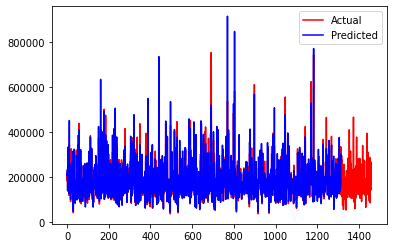

In [48]:
plt.plot(y,'r',label='Actual')
plt.plot(y_pred,'b',label='Predicted')
plt.legend()

In [0]:
with torch.no_grad():
  y_test = model(test_data)


In [50]:
y_test

tensor([[12.3181],
        [12.0943],
        [17.9407],
        ...,
        [14.1438],
        [11.2012],
        [19.9565]], device='cuda:0')

In [51]:

y_test = y_test.cpu()
y_test = y_test.detach().numpy()
y_test = np.exp(y_test)
y_test

array([[2.2370442e+05],
       [1.7885195e+05],
       [6.1880152e+07],
       ...,
       [1.3886435e+06],
       [7.3217375e+04],
       [4.6452051e+08]], dtype=float32)

In [58]:
pd.options.display.float_format = '{:.2f}'.format
submission = pd.DataFrame({'id':df_test['Id'],'SalePrice':y_test.flatten().astype('double')})
submission

,id,SalePrice
0,1461,223704.42
1,1462,178851.95
2,1463,61880152.00
3,1464,44828764.00
4,1465,76187.34
...,...,...
1454,2915,2792086306816.00
1455,2916,17860788.00
1456,2917,1388643.50
1457,2918,73217.38


In [0]:
submission.to_csv('kaggle_submission.csv',index=False)